In [1]:
%cd -q '../'

In [2]:
import pickle
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# reload(notebooks.config);
from sklearn.model_selection import train_test_split

import notebooks.helpers as hp
from notebooks.config import *

reload(hp);
%matplotlib inline

In [3]:
df = pd.read_csv(
    DF_TRAIN_FILE_PATH,
    dtype_backend="pyarrow",
    index_col=INDEX,
)

In [4]:
# Renaming initial column names to more intuitive column names
df, features_info = hp.rename_init_col_names(df)

# Downcast label column
df[LABEL] = pd.to_numeric(df[LABEL], downcast="signed")

In [5]:
n_rows, n_cols = df.shape

print("Entire dataset shape")
print(20 * "-")
print(f"No of rows: {n_rows}")
print(f"No of cols: {n_cols}")
print(20 * "-")
print(f"Duplicate rows: {df.duplicated().sum()}")

del n_rows, n_cols

Entire dataset shape
--------------------
No of rows: 1460
No of cols: 80
--------------------
Duplicate rows: 0


In [6]:
df_train, df_test = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_SEED)

idx_to_remove = []

In [7]:
n_rows_train, n_cols_train = df_train.shape

print("Train dataset shape")
print(20 * "-")
print(f"No of rows: {n_rows_train}")
print(f"No of cols: {n_cols_train}")

print()

n_rows_test, n_cols_test = df_test.shape

print("Test dataset shape")
print(20 * "-")
print(f"No of rows: {n_rows_test}")
print(f"No of cols: {n_cols_test}")
print(20 * "-")

Train dataset shape
--------------------
No of rows: 1168
No of cols: 80

Test dataset shape
--------------------
No of rows: 292
No of cols: 80
--------------------


In [8]:
df_train.isna().sum().sort_values(ascending=False).iloc[:20]

PoolQ           1163
MiscFeature     1120
Alley           1095
FenceQ           944
MasVnrType       694
FireplaceQ       559
LotFrontage      209
GarageCond        65
GarageQ           65
GarageType        65
GarageFinish      65
GarageYrBlt       65
BsmtExposure      33
BsmtFin2Type      33
BsmtQ             32
BsmtCond          32
BsmtFin1Type      32
MasVnrSF           6
MSSubClass         0
Fireplaces         0
dtype: int64

There are 18 columns with missing values and they all need to be handled.

In [9]:
# Downcast non-numerical columns
df_train = hp.downcast_nonnumerical_dtypes(
    df_train,
    features_info["binary"],
    features_info["ordinal"],
    features_info["nominal"],
)
df_test = hp.downcast_nonnumerical_dtypes(
    df_test,
    features_info["binary"],
    features_info["ordinal"],
    features_info["nominal"],
)

# Downcast numerical columns
for c in features_info["numerical"]:
    df_train[c] = pd.to_numeric(df_train[c], downcast="signed")
    df_test[c] = pd.to_numeric(df_test[c], downcast="signed")

# Downcast column names
df_train.columns = df_train.columns.astype("string[pyarrow]")
df_test.columns = df_test.columns.astype("string[pyarrow]")

# Convert from square feet to square meters variables denoting area
features_info_numerical_copy = features_info["numerical"][:]
df_train, features_info["numerical"] = hp.convert_sf_to_m2(df_train, features_info["numerical"])
df_test, _ = hp.convert_sf_to_m2(df_test, features_info_numerical_copy)

del features_info_numerical_copy

<h1> Univariate analysis

<h2> Numerical features

In [10]:
current_numerical_col = "LotFrontage"
hp.display_feature_name_heading(current_numerical_col)

<h3>'LotFrontage' feature</h3>

Univariate analysis of 'LotFrontage' column
Histogram and box plot


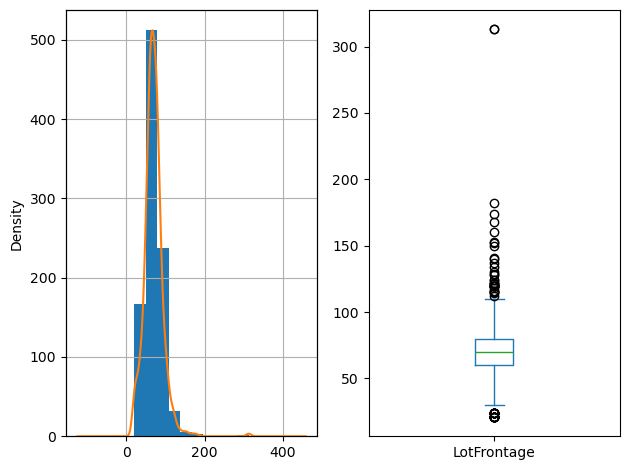

Descriptive statistics


count    959.000000
mean      70.033368
std       24.558543
min       21.000000
25%       60.000000
50%       70.000000
75%       80.000000
max      313.000000
Name: LotFrontage, dtype: double[pyarrow]

Variance: 0.35066917622261795
Skewness: 2.4388252792905756
Kurtosis: 20.365236143170645

NA values
Count [n]: 209
Percentage [%]: 17.893835616438356%


In [11]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

<h3>'LotM2' feature</h3>

Univariate analysis of 'LotM2' column
Histogram and box plot


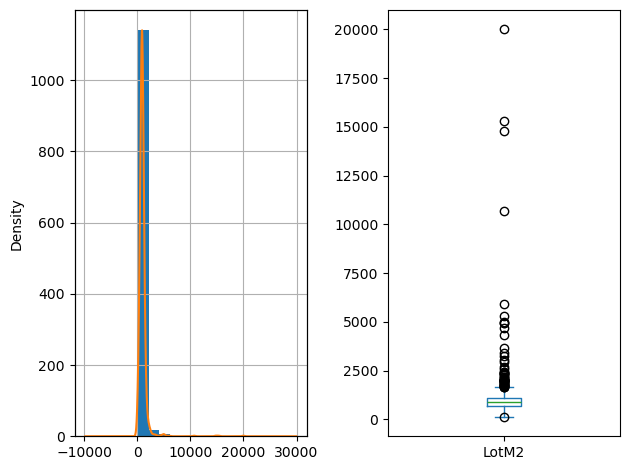

Descriptive statistics


count     1168.000000
mean       983.549531
std        993.652149
min        120.773952
25%        700.372793
50%        878.026631
75%       1080.323001
max      19996.914845
Name: LotM2, dtype: double[pyarrow]

Variance: 1.0102715910053632
Skewness: 12.138159517065379
Kurtosis: 190.51119378067807

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [12]:
current_numerical_col = "LotM2"

hp.display_feature_name_heading(current_numerical_col)
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

In [13]:
current_numerical_col = "OverallQ"
hp.display_feature_name_heading(current_numerical_col)

<h3>'OverallQ' feature</h3>

In [14]:
hp.get_value_counts_freq_with_perc(df_train, current_numerical_col)

,count,percentage [%]
OverallQ,,
6,310,26.541096
5,310,26.541096
7,248,21.232877
8,131,11.215753
4,96,8.219178
9,37,3.167808
3,18,1.541096
10,13,1.113014
2,3,0.256849


In [15]:
current_numerical_col = "OverallCond"
hp.display_feature_name_heading(current_numerical_col)

<h3>'OverallCond' feature</h3>

In [16]:
hp.get_value_counts_freq_with_perc(df_train, current_numerical_col)

,count,percentage [%]
OverallCond,,
5,656,56.164384
6,196,16.780822
7,168,14.383562
8,59,5.051370
4,44,3.767123
3,21,1.797945
9,18,1.541096
2,5,0.428082
1,1,0.085616


<h3>'YearBuilt' feature</h3>

Univariate analysis of 'YearBuilt' column
Histogram and box plot


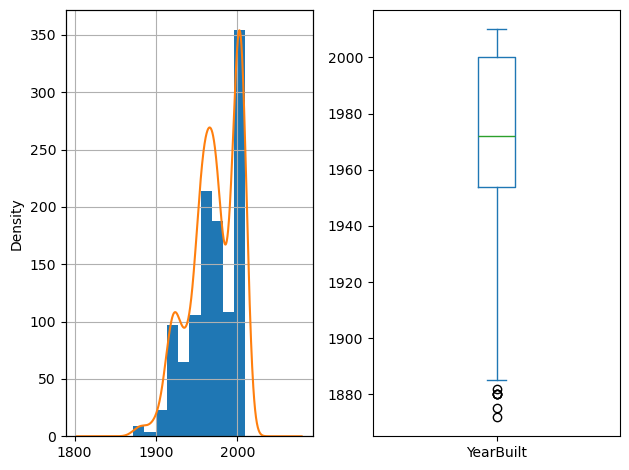

Descriptive statistics


count    1168.000000
mean     1971.234589
std        29.734612
min      1872.000000
25%      1954.000000
50%      1972.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: double[pyarrow]

Variance: 0.01508425842929091
Skewness: -0.6176686518921982
Kurtosis: -0.33903876600894023

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'YearRemodAdd' feature</h3>

Univariate analysis of 'YearRemodAdd' column
Histogram and box plot


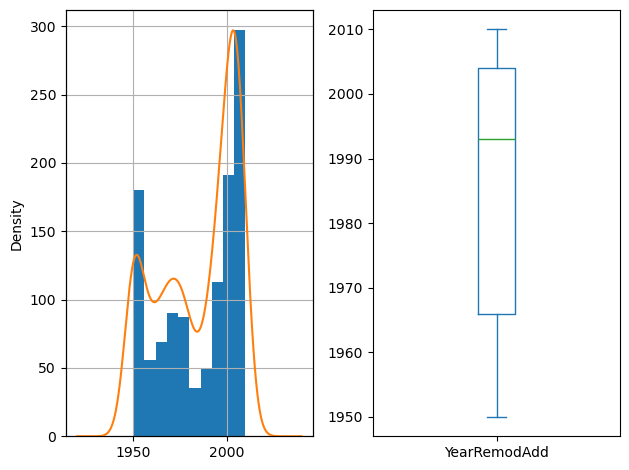

Descriptive statistics


count    1168.000000
mean     1984.488014
std        20.670090
min      1950.000000
25%      1966.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: double[pyarrow]

Variance: 0.010415830357043788
Skewness: -0.46283275918928135
Kurtosis: -1.305944474653702

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'MasVnrM2' feature</h3>

Univariate analysis of 'MasVnrM2' column
Histogram and box plot


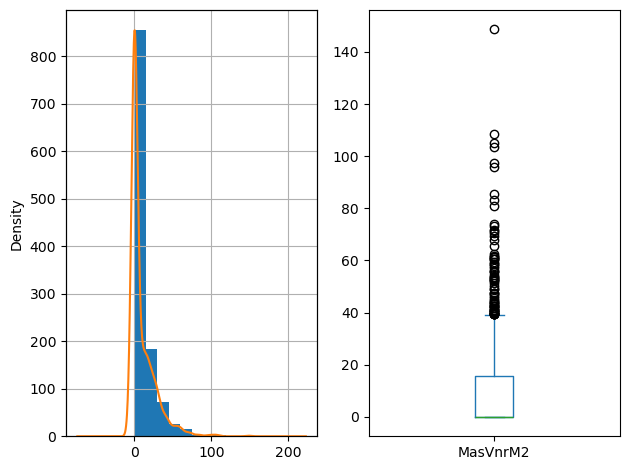

Descriptive statistics


count    1162.000000
mean        9.702851
std        16.638780
min         0.000000
25%         0.000000
50%         0.000000
75%        15.677388
max       148.644864
Name: MasVnrM2, dtype: double[pyarrow]

Variance: 1.714834100405074
Skewness: 2.602299189356271
Kurtosis: 9.763273700823605

NA values
Count [n]: 6
Percentage [%]: 0.5136986301369862%


<h3>'BsmtFin1M2' feature</h3>

Univariate analysis of 'BsmtFin1M2' column
Histogram and box plot


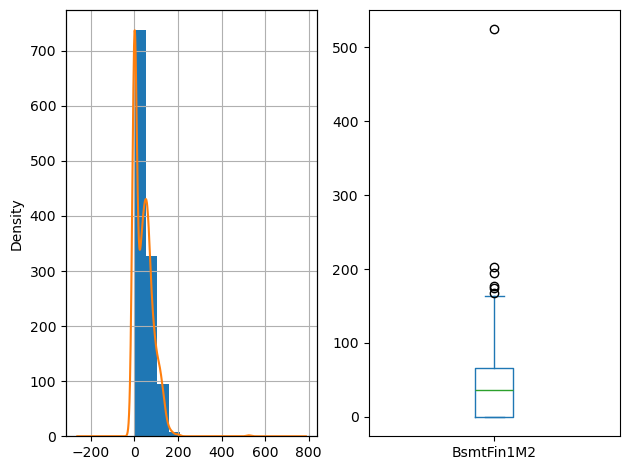

Descriptive statistics


count    1168.000000
mean       41.796187
std        42.974785
min         0.000000
25%         0.000000
50%        36.139283
75%        66.170190
max       524.344758
Name: BsmtFin1M2, dtype: double[pyarrow]

Variance: 1.0281986940120011
Skewness: 1.849628814792844
Kurtosis: 12.984430040121149

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'BsmtFin2M2' feature</h3>

Univariate analysis of 'BsmtFin2M2' column
Histogram and box plot


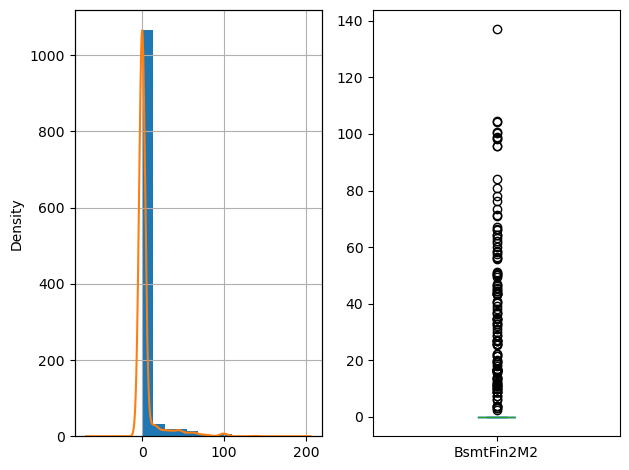

Descriptive statistics


count    1168.000000
mean        4.246417
std        15.079055
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       136.939081
Name: BsmtFin2M2, dtype: double[pyarrow]

Variance: 3.5510068860147492
Skewness: 4.432981167663541
Kurtosis: 21.867268859289133

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'BsmtUnfM2' feature</h3>

Univariate analysis of 'BsmtUnfM2' column
Histogram and box plot


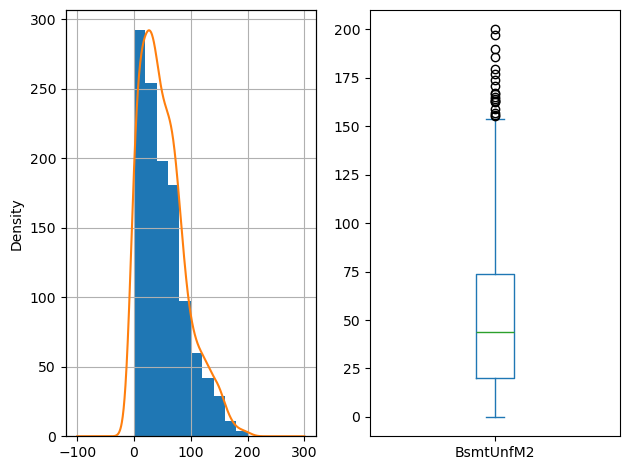

Descriptive statistics


count    1168.000000
mean       51.386755
std        39.994894
min         0.000000
25%        19.974154
50%        43.803783
75%        73.602433
max       200.020245
Name: BsmtUnfM2, dtype: double[pyarrow]

Variance: 0.7783113254194919
Skewness: 0.9011162947630585
Kurtosis: 0.4508739793846064

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'TotalBsmtM2' feature</h3>

Univariate analysis of 'TotalBsmtM2' column
Histogram and box plot


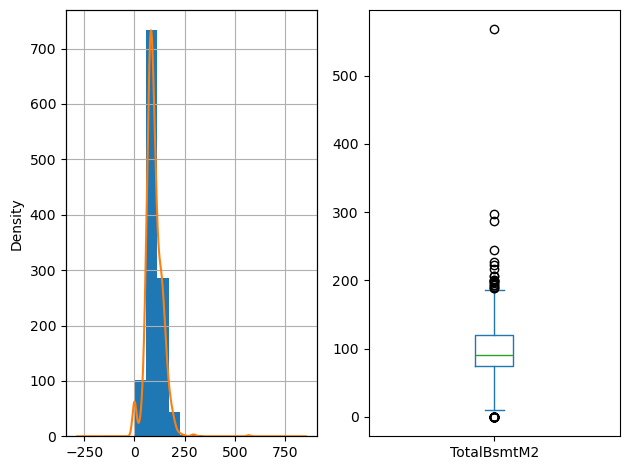

Descriptive statistics


count    1168.000000
mean       97.429359
std        40.742040
min         0.000000
25%        73.950820
50%        91.044979
75%       119.333955
max       567.637574
Name: TotalBsmtM2, dtype: double[pyarrow]

Variance: 0.41817005509344957
Skewness: 1.6764353963502316
Kurtosis: 15.819489700142675

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [17]:
l = [
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrM2",
    "BsmtFin1M2",
    "BsmtFin2M2",
    "BsmtUnfM2",
    "TotalBsmtM2",
]
for x in l:
    current_numerical_col = x
    hp.display_feature_name_heading(current_numerical_col)
    hp.show_hist_box_numerical_col(df_train, current_numerical_col)

del l

In [18]:
current_numerical_col = "1stFlrM2"
hp.display_feature_name_heading(current_numerical_col)

<h3>'1stFlrM2' feature</h3>

Univariate analysis of '1stFlrM2' column
Histogram and box plot


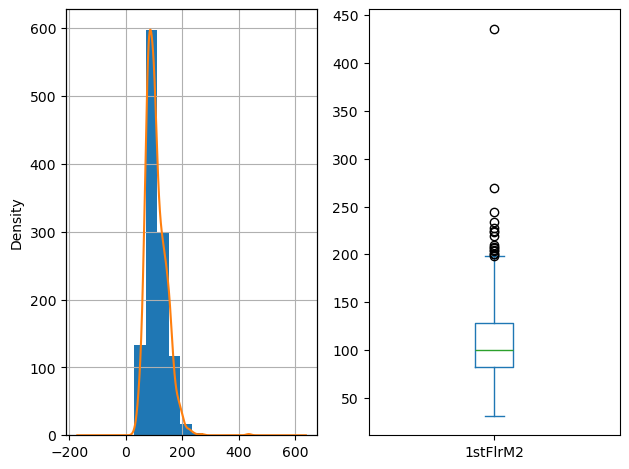

Descriptive statistics


count    1168.000000
mean      107.401243
std        35.594547
min        31.029615
25%        81.894030
50%       100.335283
75%       128.415227
max       435.901064
Name: 1stFlrM2, dtype: double[pyarrow]

Variance: 0.3314165284674165
Skewness: 1.3854286109634837
Kurtosis: 6.369275944969964

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [19]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

In [20]:
current_numerical_col = "2ndFlrM2"
hp.display_feature_name_heading(current_numerical_col)

<h3>'2ndFlrM2' feature</h3>

Univariate analysis of '2ndFlrM2' column
Histogram and box plot


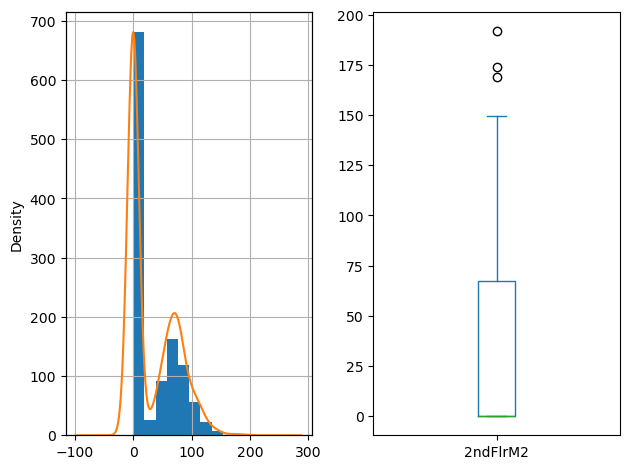

Descriptive statistics


count    1168.000000
mean       31.174299
std        40.199523
min         0.000000
25%         0.000000
50%         0.000000
75%        67.401156
max       191.844778
Name: 2ndFlrM2, dtype: double[pyarrow]

Variance: 1.2895084718597676
Skewness: 0.8598020261954217
Kurtosis: -0.4624028873934556

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [21]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

In [22]:
hp.show_zero_vals_percs(df_train, current_numerical_col)

Zero values '2ndFlrM2'
Count [n]: 678
Percentage [%]: 58.04794520547946%


Show distribution of houses with 2nd floor and their area in m^2.

Univariate analysis of '2ndFlrM2' column
Histogram and box plot


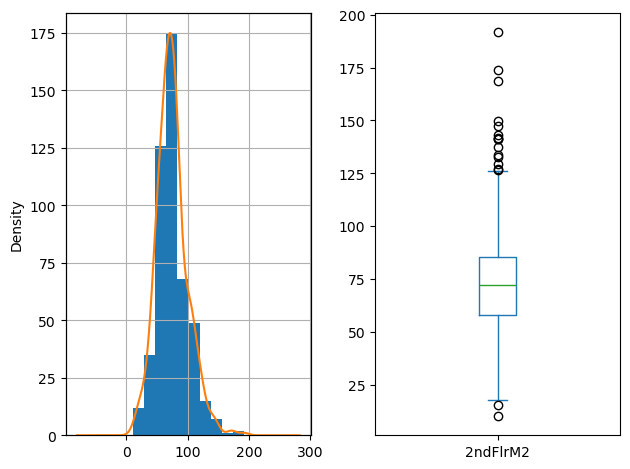

Descriptive statistics


count    490.000000
mean      74.309350
std       25.390951
min       10.219334
25%       58.087626
50%       71.999856
75%       85.424345
max      191.844778
Name: 2ndFlrM2, dtype: double[pyarrow]

Variance: 0.34169255288344175
Skewness: 0.6969170419692651
Kurtosis: 1.4822997344874471

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [23]:
second_floor_houses_area_subset = df_train.loc[
    df_train[current_numerical_col] != 0, [current_numerical_col]
]
hp.show_hist_box_numerical_col(second_floor_houses_area_subset, current_numerical_col)

In [24]:
current_numerical_col = "LowQualFinM2"
hp.display_feature_name_heading(current_numerical_col)

<h3>'LowQualFinM2' feature</h3>

Univariate analysis of 'LowQualFinM2' column
Histogram and box plot


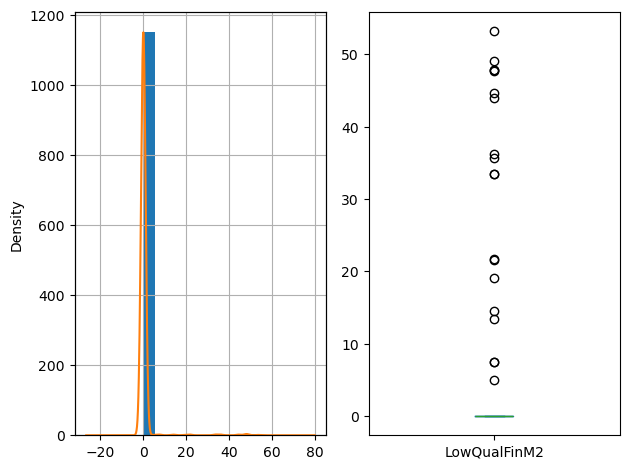

Descriptive statistics


count    1168.000000
mean        0.499036
std         4.376666
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        53.140539
Name: LowQualFinM2, dtype: double[pyarrow]

Variance: 8.770247269111497
Skewness: 9.577190166274233
Kurtosis: 94.4112639620378

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [25]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

In [26]:
hp.show_positive_vals_percs(df_train, current_numerical_col)

Positive values 'LowQualFinM2'
Count [n]: 19
Percentage [%]: 1.6267123287671232%


In [27]:
features_info["features_to_delete"].append(current_numerical_col)

In [28]:
current_numerical_col = "GrLivM2"
hp.display_feature_name_heading(current_numerical_col)

<h3>'GrLivM2' feature</h3>

Univariate analysis of 'GrLivM2' column
Histogram and box plot


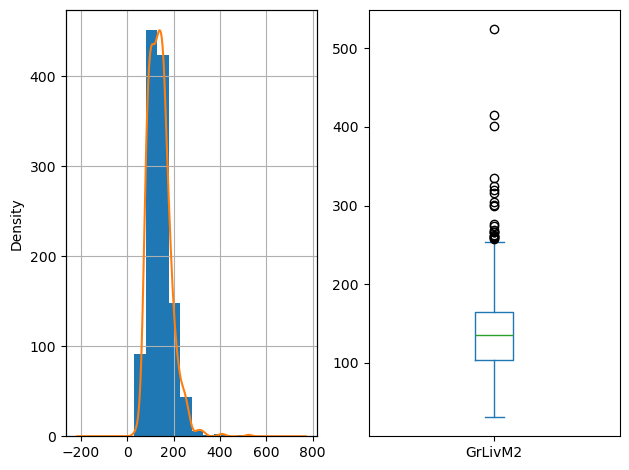

Descriptive statistics


count    1168.000000
mean      139.074578
std        48.127743
min        31.029615
25%       103.284955
50%       134.895214
75%       164.252575
max       524.158952
Name: GrLivM2, dtype: double[pyarrow]

Variance: 0.34605708379165595
Skewness: 1.363291492445032
Kurtosis: 5.257033384444204

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [29]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

Univariate analysis of 'GrLivM2' column
Histogram and box plot


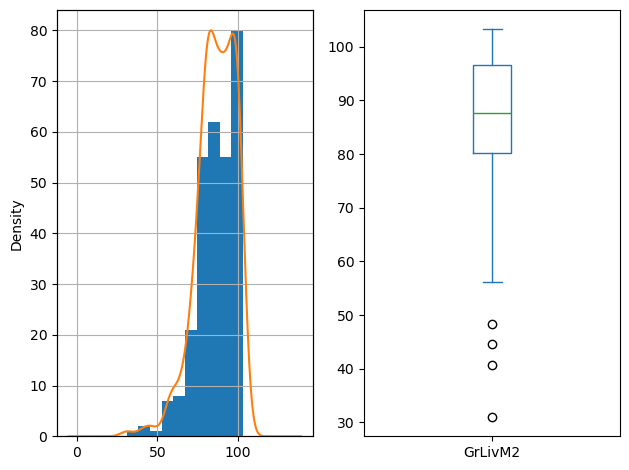

Descriptive statistics


count    292.000000
mean      86.329514
std       11.986945
min       31.029615
25%       80.198549
50%       87.654018
75%       96.619162
max      103.215277
Name: GrLivM2, dtype: double[pyarrow]

Variance: 0.13885107059529828
Skewness: -1.0487521547617387
Kurtosis: 1.8787714216859435

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [30]:
_GrLivM2_below_1st_quantile_subset = df_train.loc[
    df_train[current_numerical_col] < df_train[current_numerical_col].quantile(0.25), :
]

hp.show_hist_box_numerical_col(
    _GrLivM2_below_1st_quantile_subset, current_numerical_col
)

In [31]:
current_numerical_col = "BsmtFullBaths"
hp.display_feature_name_heading(current_numerical_col)

<h3>'BsmtFullBaths' feature</h3>

In [32]:
hp.get_value_counts_freq_with_perc(df_train, current_numerical_col)

,count,percentage [%]
BsmtFullBaths,,
0,677,57.962329
1,477,40.839041
2,13,1.113014
3,1,0.085616


In [33]:
current_numerical_col = "BsmtHalfBaths"
hp.display_feature_name_heading(current_numerical_col)

<h3>'BsmtHalfBaths' feature</h3>

In [34]:
hp.get_value_counts_freq_with_perc(df_train, current_numerical_col)

,count,percentage [%]
BsmtHalfBaths,,
0,1103,94.434932
1,63,5.393836
2,2,0.171233


In [35]:
# Tree models
# Converting 'BsmtHalfBaths' to binary column.
# df[current_numerical_col] = (df
# .loc[:, current_numerical_col]
# .apply(lambda x: False if x == 0 else True)
# .astype("bool[pyarrow]")
# )

# binary.append(current_numerical_col)
# numerical.remove(current_numerical_col)

In [36]:
current_numerical_col = "FullBaths"
hp.display_feature_name_heading(current_numerical_col)

<h3>'FullBaths' feature</h3>

In [37]:
hp.get_value_counts_freq_with_perc(df_train, current_numerical_col)

,count,percentage [%]
FullBaths,,
2,614,52.568493
1,523,44.777397
3,23,1.969178
0,8,0.684932


In [38]:
current_numerical_col = "HalfBaths"
hp.display_feature_name_heading(current_numerical_col)

<h3>'HalfBaths' feature</h3>

In [39]:
hp.get_value_counts_freq_with_perc(df_train, current_numerical_col)

,count,percentage [%]
HalfBaths,,
0,744,63.698630
1,415,35.530822
2,9,0.770548


In [40]:
current_numerical_col = "Bedrooms"
hp.display_feature_name_heading(current_numerical_col)

<h3>'Bedrooms' feature</h3>

In [41]:
hp.get_value_counts_freq_with_perc(df_train, current_numerical_col)

,count,percentage [%]
Bedrooms,,
3,636,54.452055
2,302,25.856164
4,164,14.041096
1,44,3.767123
5,13,1.113014
0,4,0.342466
6,4,0.342466
8,1,0.085616


In [42]:
current_numerical_col = "Kitchens"
hp.display_feature_name_heading(current_numerical_col)

<h3>'Kitchens' feature</h3>

In [43]:
hp.get_value_counts_freq_with_perc(df_train, current_numerical_col)

,count,percentage [%]
Kitchens,,
1,1112,95.205479
2,53,4.537671
3,2,0.171233
0,1,0.085616


In [44]:
current_numerical_col = "TotalRooms"
hp.display_feature_name_heading(current_numerical_col)

<h3>'TotalRooms' feature</h3>

Univariate analysis of 'TotalRooms' column
Histogram and box plot


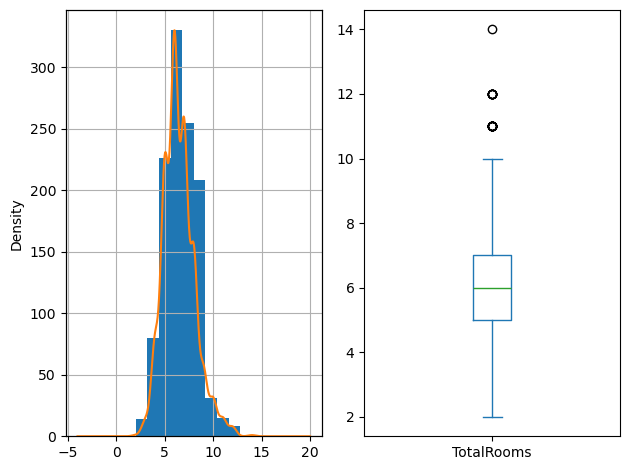

Descriptive statistics


count    1168.000000
mean        6.472603
std         1.604173
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotalRooms, dtype: double[pyarrow]

Variance: 0.24784045636630045
Skewness: 0.7062361291185153
Kurtosis: 1.0453332952856194

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [45]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

In [46]:
total_rooms_below_5_subset = df_train.loc[df_train[current_numerical_col] < 5, :]

hp.get_value_counts_freq_with_perc(total_rooms_below_5_subset, current_numerical_col)

,count,percentage [%]
TotalRooms,,
4,80,85.106383
3,13,13.829787
2,1,1.063830


In [47]:
current_numerical_col = "Fireplaces"
hp.display_feature_name_heading(current_numerical_col)

<h3>'Fireplaces' feature</h3>

In [48]:
hp.get_value_counts_freq_with_perc(df_train, current_numerical_col)

,count,percentage [%]
Fireplaces,,
0,559,47.859589
1,515,44.092466
2,90,7.705479
3,4,0.342466


In [49]:
current_numerical_col = "GarageYrBlt"
hp.display_feature_name_heading(current_numerical_col)

<h3>'GarageYrBlt' feature</h3>

Univariate analysis of 'GarageYrBlt' column
Histogram and box plot


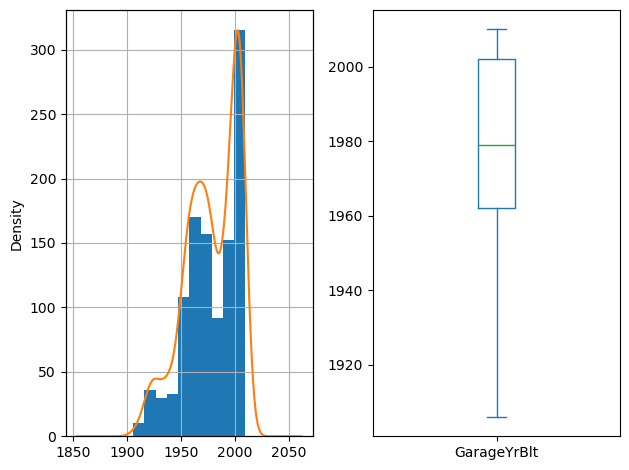

Descriptive statistics


count    1103.000000
mean     1978.479601
std        24.306409
min      1906.000000
25%      1962.000000
50%      1979.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: double[pyarrow]

Variance: 0.012285397997723229
Skewness: -0.6236049555227717
Kurtosis: -0.4370391755504537

NA values
Count [n]: 65
Percentage [%]: 5.565068493150685%


In [50]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

In [51]:
current_numerical_col = "GarageCars"
hp.display_feature_name_heading(current_numerical_col)

<h3>'GarageCars' feature</h3>

In [52]:
hp.get_value_counts_freq_with_perc(df_train, current_numerical_col)

,count,percentage [%]
GarageCars,,
2,665,56.934932
1,293,25.085616
3,141,12.071918
0,65,5.565068
4,4,0.342466


In [53]:
current_numerical_col = "GarageM2"
hp.display_feature_name_heading(current_numerical_col)

<h3>'GarageM2' feature</h3>

Univariate analysis of 'GarageM2' column
Histogram and box plot


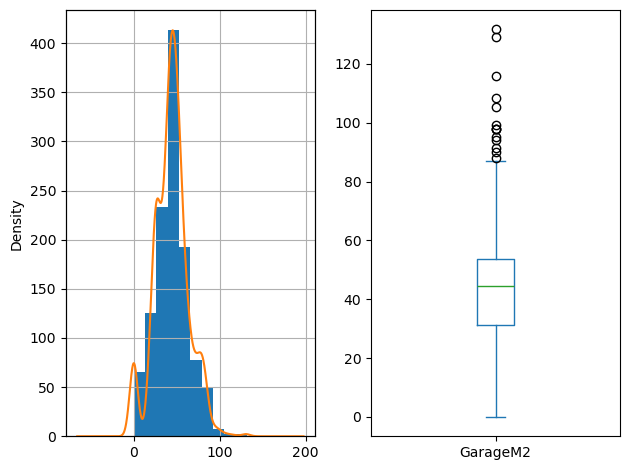

Descriptive statistics


count    1168.000000
mean       43.905356
std        19.594615
min         0.000000
25%        31.215421
50%        44.593459
75%        53.512151
max       131.736511
Name: GarageM2, dtype: double[pyarrow]

Variance: 0.4462921303662311
Skewness: 0.14561728780760907
Kurtosis: 0.9465647220635627

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [54]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

In [55]:
hp.show_zero_vals_percs(df_train, current_numerical_col)

Zero values 'GarageM2'
Count [n]: 65
Percentage [%]: 5.565068493150685%


In [56]:
top_outliers_garage_area_idx = hp.get_outliers_idx_using_boxplot(
    df_train, current_numerical_col
)["top"]
top_outliers_garage_areas = df_train.loc[
    top_outliers_garage_area_idx, current_numerical_col
]
top_outliers_garage_areas

Id
582     129.135226
1418     99.313350
271      97.826901
1299    131.736511
665     105.352047
1143     97.733998
318      95.225616
1229     97.733998
409      87.979179
1351     89.930143
179     108.324945
1269     94.203683
719      91.323688
1062    115.942994
Name: GarageM2, dtype: double[pyarrow]

In [57]:
current_numerical_col = "WoodDeckM2"
hp.display_feature_name_heading(current_numerical_col)

<h3>'WoodDeckM2' feature</h3>

Univariate analysis of 'WoodDeckM2' column
Histogram and box plot


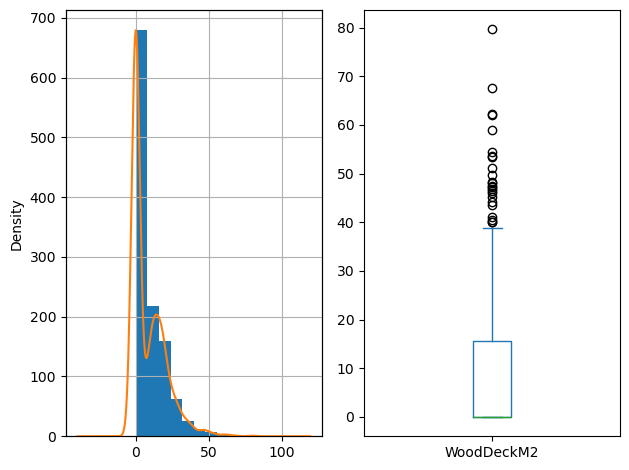

Descriptive statistics


count    1168.000000
mean        8.418463
std        11.562842
min         0.000000
25%         0.000000
50%         0.000000
75%        15.607711
max        79.617905
Name: WoodDeckM2, dtype: double[pyarrow]

Variance: 1.3735098860861195
Skewness: 1.6346410736161086
Kurtosis: 3.4349467459060294

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [58]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

In [59]:
current_numerical_col = "OpenPorchM2"
hp.display_feature_name_heading(current_numerical_col)

<h3>'OpenPorchM2' feature</h3>

Univariate analysis of 'OpenPorchM2' column
Histogram and box plot


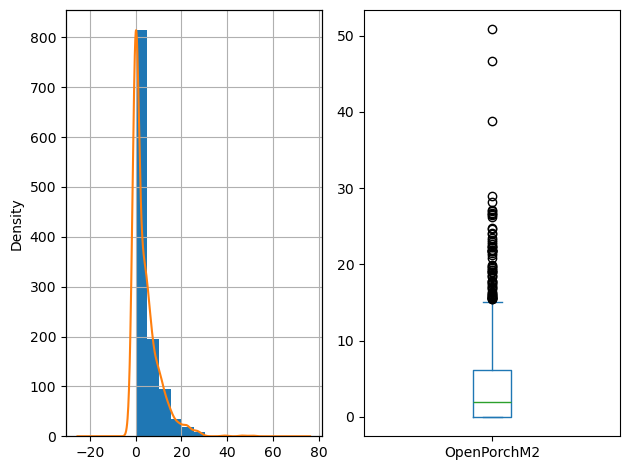

Descriptive statistics


count    1168.000000
mean        4.124640
std         5.887547
min         0.000000
25%         0.000000
50%         1.950964
75%         6.131601
max        50.817963
Name: OpenPorchM2, dtype: double[pyarrow]

Variance: 1.427408453347786
Skewness: 2.301106017987208
Kurtosis: 8.307879296375951

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [60]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

In [61]:
current_numerical_col = "EnclosedPorchM2"
hp.display_feature_name_heading(current_numerical_col)

<h3>'EnclosedPorchM2' feature</h3>

Univariate analysis of 'EnclosedPorchM2' column
Histogram and box plot


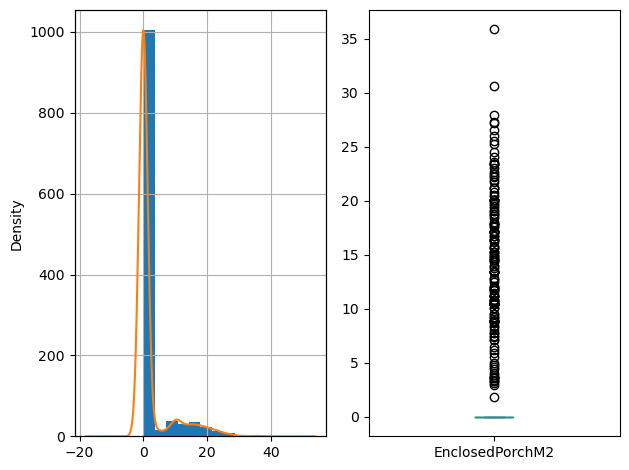

Descriptive statistics


count    1168.000000
mean        2.058661
std         5.552390
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.860573
Name: EnclosedPorchM2, dtype: double[pyarrow]

Variance: 2.697087427778422
Skewness: 2.802085048600877
Kurtosis: 7.2599795726748635

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [62]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

In [63]:
hp.show_positive_vals_percs(df_train, current_numerical_col)

Positive values 'EnclosedPorchM2'
Count [n]: 170
Percentage [%]: 14.554794520547945%


In [64]:
current_numerical_col = "3SsnPorchM2"
hp.display_feature_name_heading(current_numerical_col)

<h3>'3SsnPorchM2' feature</h3>

Univariate analysis of '3SsnPorchM2' column
Histogram and box plot


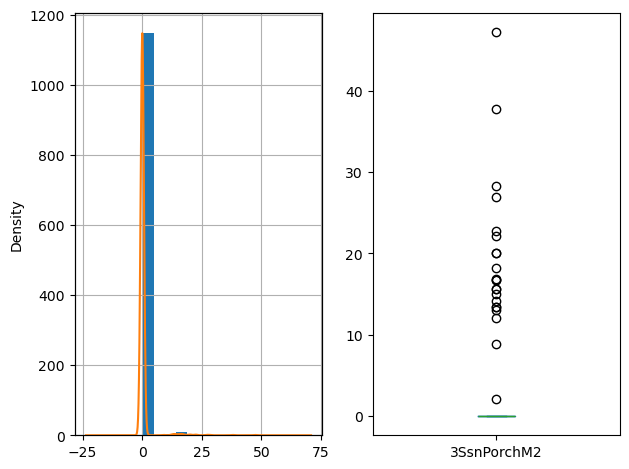

Descriptive statistics


count    1168.000000
mean        0.357136
std         2.882074
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        47.194744
Name: 3SsnPorchM2, dtype: double[pyarrow]

Variance: 8.069967108148477
Skewness: 9.781947059599004
Kurtosis: 112.37149970484741

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [65]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

In [66]:
hp.show_positive_vals_percs(df_train, current_numerical_col)

Positive values '3SsnPorchM2'
Count [n]: 22
Percentage [%]: 1.8835616438356164%


In [67]:
features_info["features_to_delete"].append("3SsnPorchM2")

In [68]:
current_numerical_col = "ScreenPorchM2"
hp.display_feature_name_heading(current_numerical_col)

<h3>'ScreenPorchM2' feature</h3>

Univariate analysis of 'ScreenPorchM2' column
Histogram and box plot


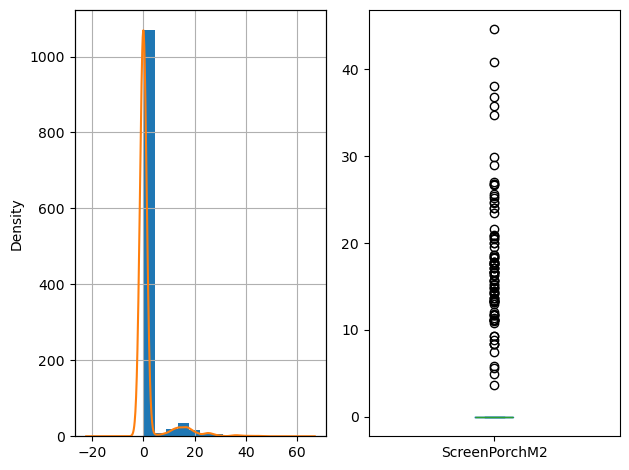

Descriptive statistics


count    1168.000000
mean        1.495914
std         5.375371
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        44.593459
Name: ScreenPorchM2, dtype: double[pyarrow]

Variance: 3.5933693844203702
Skewness: 4.060454840027124
Kurtosis: 17.99131038511145

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [69]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

In [70]:
hp.show_positive_vals_percs(df_train, current_numerical_col)

Positive values 'ScreenPorchM2'
Count [n]: 100
Percentage [%]: 8.561643835616438%


In [71]:
current_numerical_col = "PoolM2"
hp.display_feature_name_heading(current_numerical_col)

<h3>'PoolM2' feature</h3>

Univariate analysis of 'PoolM2' column
Histogram and box plot


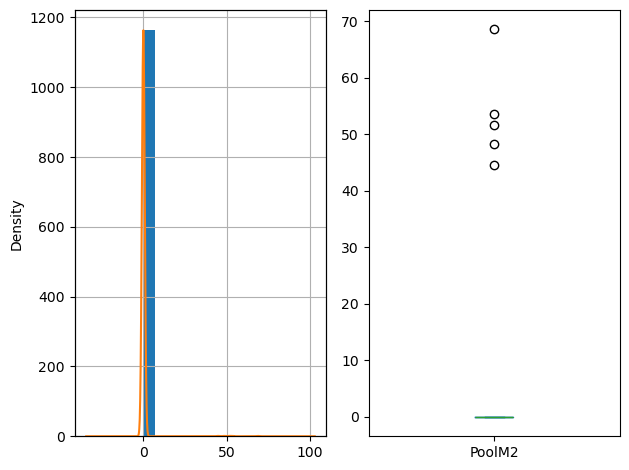

Descriptive statistics


count    1168.000000
mean        0.228122
std         3.521942
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        68.562444
Name: PoolM2, dtype: double[pyarrow]

Variance: 15.438887153490839
Skewness: 15.766514888825853
Kurtosis: 253.335342382953

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [72]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

In [73]:
hp.show_positive_vals_percs(df_train, current_numerical_col)

Positive values 'PoolM2'
Count [n]: 5
Percentage [%]: 0.4280821917808219%


In [74]:
features_info["features_to_delete"].extend(["PoolM2", "PoolQ"])

In [75]:
current_numerical_col = "MiscVal"
hp.display_feature_name_heading(current_numerical_col)

<h3>'MiscVal' feature</h3>

Univariate analysis of 'MiscVal' column
Histogram and box plot


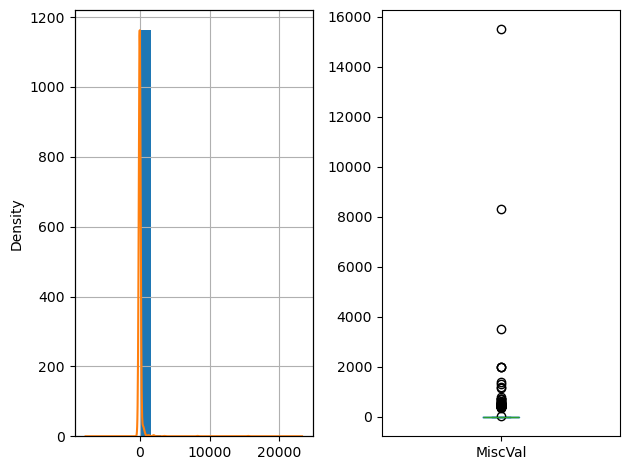

Descriptive statistics


count     1168.000000
mean        48.196918
std        545.027785
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: double[pyarrow]

Variance: 11.30835350799494
Skewness: 22.904958245009787
Kurtosis: 598.0183937059162

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [76]:
hp.show_hist_box_numerical_col(df_train, current_numerical_col)

In [77]:
hp.show_positive_vals_percs(df_train, current_numerical_col)

Positive values 'MiscVal'
Count [n]: 46
Percentage [%]: 3.9383561643835616%


Univariate analysis of 'MiscVal' column
Histogram and box plot


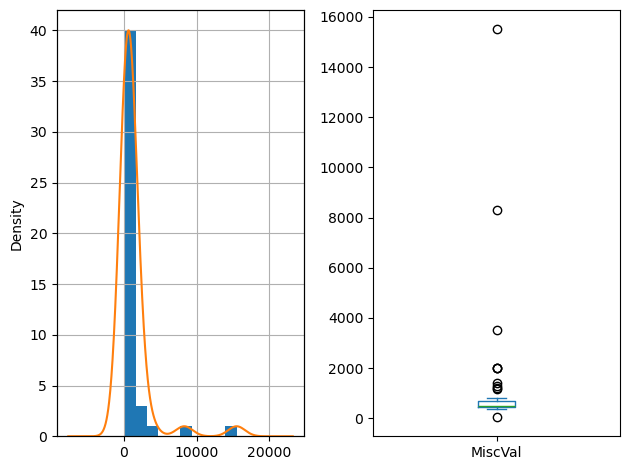

Descriptive statistics


count       46.000000
mean      1223.782609
std       2496.598120
min         54.000000
25%        450.000000
50%        500.000000
75%        700.000000
max      15500.000000
Name: MiscVal, dtype: double[pyarrow]

Variance: 2.040066677272334
Skewness: 4.7097922929573555
Kurtosis: 22.777392969697498

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [78]:
MiscVal_positive_subset = df_train.loc[
    df_train[current_numerical_col] > 0, [current_numerical_col]
]
hp.show_hist_box_numerical_col(MiscVal_positive_subset, current_numerical_col)

In [79]:
current_numerical_col = "YrSold"
hp.display_feature_name_heading(current_numerical_col)

<h3>'YrSold' feature</h3>

In [80]:
hp.get_value_counts_freq_with_perc(df_train, current_numerical_col)

,count,percentage [%]
YrSold,,
2007,265,22.688356
2009,262,22.431507
2008,251,21.489726
2006,250,21.404110
2010,140,11.986301


In [81]:
del current_numerical_col

# Binary Values

In [82]:
for c in features_info["binary"]:
    display(hp.get_value_counts_freq_with_perc(df_train, c))

,count,percentage [%]
Street,,
False,1168,100.0


,count,percentage [%]
CentralAir,,
True,1090,93.321918
False,78,6.678082


In [83]:
# Street will be deleted (only one category)
hp.delete_column_and_update_columns_list(
    df_train, "Street", features_info["binary"]
)
hp.delete_column_and_update_columns_list(
    df_test, "Street", features_info["binary"], False
)

## Ordinal features

In [84]:
for c in features_info["ordinal"]:
    display(hp.get_value_counts_freq_with_perc(df_train, c))

,count,percentage [%]
LotShape,,
Reg,736,63.013699
IR1,394,33.732877
IR2,30,2.568493
IR3,8,0.684932


,count,percentage [%]
LandContour,,
Lvl,1044,89.383562
Bnk,52,4.452055
HLS,41,3.510274
Low,31,2.654110


,count,percentage [%]
Utilities,,
AllPub,1167,99.914384
NoSeWa,1,0.085616


,count,percentage [%]
LandSlope,,
Gtl,1102,94.349315
Mod,54,4.623288
Sev,12,1.027397


,count,percentage [%]
ExterQ,,
TA,731,62.585616
Gd,384,32.876712
Ex,40,3.424658
Fa,13,1.113014


,count,percentage [%]
ExterCond,,
TA,1026,87.842466
Gd,117,10.017123
Fa,21,1.797945
Ex,3,0.256849
Po,1,0.085616


,count,percentage [%]
BsmtQ,,
TA,515,44.092466
Gd,497,42.551370
Ex,93,7.962329
NaN,32,2.739726
Fa,31,2.654110


,count,percentage [%]
BsmtCond,,
TA,1047,89.640411
Gd,54,4.623288
Fa,33,2.825342
NaN,32,2.739726
Po,2,0.171233


,count,percentage [%]
BsmtExposure,,
No,748,64.041096
Av,179,15.325342
Gd,117,10.017123
Mn,91,7.791096
NaN,33,2.825342


,count,percentage [%]
BsmtFin1Type,,
Unf,340,29.109589
GLQ,335,28.681507
ALQ,184,15.753425
BLQ,122,10.445205
Rec,99,8.476027
LwQ,56,4.794521
NaN,32,2.739726


,count,percentage [%]
BsmtFin2Type,,
Unf,1003,85.873288
Rec,41,3.510274
LwQ,39,3.339041
NaN,33,2.825342
BLQ,29,2.482877
ALQ,14,1.198630
GLQ,9,0.770548


,count,percentage [%]
HeatingQ,,
Ex,579,49.571918
TA,354,30.308219
Gd,192,16.438356
Fa,42,3.595890
Po,1,0.085616


,count,percentage [%]
Electrical,,
SBrkr,1067,91.352740
FuseA,73,6.250000
FuseF,24,2.054795
FuseP,3,0.256849
Mix,1,0.085616


,count,percentage [%]
KitchenQ,,
TA,596,51.027397
Gd,456,39.041096
Ex,82,7.020548
Fa,34,2.910959


,count,percentage [%]
Functional,,
Typ,1085,92.893836
Min2,28,2.397260
Min1,27,2.311644
Mod,12,1.027397
Maj1,11,0.941781
Maj2,4,0.342466
Sev,1,0.085616


,count,percentage [%]
FireplaceQ,,
NaN,559,47.859589
Gd,304,26.027397
TA,240,20.547945
Fa,26,2.226027
Ex,22,1.883562
Po,17,1.455479


,count,percentage [%]
GarageFinish,,
Unf,478,40.924658
RFn,340,29.109589
Fin,285,24.400685
NaN,65,5.565068


,count,percentage [%]
GarageQ,,
TA,1051,89.982877
NaN,65,5.565068
Fa,35,2.996575
Gd,11,0.941781
Ex,3,0.256849
Po,3,0.256849


,count,percentage [%]
GarageCond,,
TA,1058,90.582192
NaN,65,5.565068
Fa,27,2.311644
Gd,9,0.770548
Po,7,0.599315
Ex,2,0.171233


,count,percentage [%]
PavedDrive,,
Y,1070,91.609589
N,74,6.335616
P,24,2.054795


,count,percentage [%]
PoolQ,,
NaN,1163,99.571918
Gd,3,0.256849
Ex,1,0.085616
Fa,1,0.085616


,count,percentage [%]
FenceQ,,
NaN,944,80.821918
MnPrv,121,10.359589
GdPrv,48,4.109589
GdWo,45,3.852740
MnWw,10,0.856164


In [85]:
cols_to_add_na_category = [
    "BsmtQ",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFin1Type",
    "BsmtFin2Type",
    "FireplaceQ",
    "GarageFinish",
    "GarageQ",
    "GarageCond",
    "FenceQ",
    "PoolQ",
]

for col_name in cols_to_add_na_category:
    df_train[col_name] = df_train[col_name].cat.add_categories(["NA"]).fillna("NA")
    df_test[col_name] = df_test[col_name].cat.add_categories(["NA"]).fillna("NA")

df_train["Electrical"] = df_train["Electrical"].replace(
    {"Mix": df_train["Electrical"].mode()[0]}  # assuming it's the most frequent cat
)
df_test["Electrical"] = df_test["Electrical"].replace(
    {"Mix": df_test["Electrical"].mode()[0]} 
)

category_orderings_dict = {
    "LotShape": ["IR3", "IR2", "IR1", "Reg"],
    "LandContour": ["Low", "HLS", "Bnk", "Lvl"],
    "Utilities": ["ELO", "NoSeWa", "NoSewr", "AllPub"],
    "LandSlope": ["Gtl", "Mod", "Sev"],
    "ExterQ": ["Po", "Fa", "TA", "Gd", "Ex"],
    "ExterCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtQ": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtCond": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtExposure": ["NA", "No", "Mn", "Av", "Gd"],
    "BsmtFin1Type": ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFin2Type": ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "HeatingQ": ["Po", "Fa", "TA", "Gd", "Ex"],
    "Electrical": ["FuseP", "FuseF", "FuseA", "SBrkr"],
    "KitchenQ": ["Po", "Fa", "TA", "Gd", "Ex"],
    "Functional": ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],
    "FireplaceQ": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "GarageFinish": ["NA", "Unf", "RFn", "Fin"],
    "GarageQ": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "GarageCond": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "PavedDrive": ["N", "P", "Y"],
    "FenceQ": ["NA", "MnWw", "GdWo", "MnPrv", "GdPrv"],
    "PoolQ": ["NA", "Fa", "TA", "Gd", "Ex"],
}

for col_name in features_info["ordinal"]:
    df_train[col_name] = hp.create_category(
        df_train[col_name], category_orderings_dict[col_name]
    )
    df_test[col_name] = hp.create_category(
        df_test[col_name], category_orderings_dict[col_name]
    )

del cols_to_add_na_category

## Nominal features

In [86]:
for c in features_info["nominal"]:
    display(hp.get_value_counts_freq_with_perc(df_train, c))

,count,percentage [%]
MSSubClass,,
20,433,37.071918
60,235,20.119863
50,109,9.332192
120,71,6.078767
30,56,4.794521
80,50,4.280822
160,50,4.280822
70,46,3.938356
90,41,3.510274


,count,percentage [%]
MSZoning,,
RL,925,79.195205
RM,173,14.811644
FV,52,4.452055
RH,12,1.027397
C (all),6,0.513699


,count,percentage [%]
Alley,,
NaN,1095,93.750000
Grvl,40,3.424658
Pave,33,2.825342


,count,percentage [%]
LotConfig,,
Inside,844,72.260274
Corner,215,18.407534
CulDSac,77,6.592466
FR2,28,2.397260
FR3,4,0.342466


,count,percentage [%]
Neighborhood,,
NAmes,184,15.753425
CollgCr,121,10.359589
OldTown,87,7.448630
Edwards,77,6.592466
Somerst,66,5.650685
NridgHt,62,5.308219
NWAmes,61,5.222603
Sawyer,60,5.136986
Gilbert,60,5.136986


,count,percentage [%]
Condition1,,
Norm,1013,86.729452
Feedr,61,5.222603
Artery,37,3.167808
RRAn,21,1.797945
PosN,12,1.027397
RRAe,10,0.856164
PosA,8,0.684932
RRNn,4,0.342466
RRNe,2,0.171233


,count,percentage [%]
Condition2,,
Norm,1155,98.886986
Feedr,6,0.513699
Artery,2,0.171233
RRNn,2,0.171233
PosA,1,0.085616
RRAe,1,0.085616
RRAn,1,0.085616


,count,percentage [%]
BldgType,,
1Fam,973,83.304795
TwnhsE,93,7.962329
Duplex,41,3.510274
Twnhs,34,2.910959
2fmCon,27,2.311644


,count,percentage [%]
HouseStyle,,
1Story,587,50.256849
2Story,349,29.880137
1.5Fin,118,10.102740
SLvl,56,4.794521
SFoyer,34,2.910959
1.5Unf,11,0.941781
2.5Unf,8,0.684932
2.5Fin,5,0.428082


,count,percentage [%]
RoofStyle,,
Gable,915,78.339041
Hip,223,19.092466
Flat,12,1.027397
Gambrel,9,0.770548
Mansard,7,0.599315
Shed,2,0.171233


,count,percentage [%]
RoofMatl,,
CompShg,1146,98.116438
Tar&Grv,10,0.856164
WdShake,5,0.428082
WdShngl,3,0.256849
ClyTile,1,0.085616
Membran,1,0.085616
Metal,1,0.085616
Roll,1,0.085616


,count,percentage [%]
Exterior1st,,
VinylSd,401,34.332192
HdBoard,187,16.010274
MetalSd,176,15.068493
Wd Sdng,161,13.784247
Plywood,91,7.791096
CemntBd,47,4.023973
BrkFace,40,3.424658
WdShing,22,1.883562
Stucco,20,1.712329


,count,percentage [%]
Exterior2nd,,
VinylSd,390,33.390411
HdBoard,172,14.726027
MetalSd,172,14.726027
Wd Sdng,156,13.356164
Plywood,123,10.530822
CmentBd,47,4.023973
Wd Shng,30,2.568493
Stucco,19,1.626712
BrkFace,18,1.541096


,count,percentage [%]
MasVnrType,,
NaN,694,59.417808
BrkFace,360,30.821918
Stone,99,8.476027
BrkCmn,15,1.284247


,count,percentage [%]
Foundation,,
CBlock,524,44.863014
PConc,504,43.150685
BrkTil,112,9.589041
Slab,21,1.797945
Stone,5,0.428082
Wood,2,0.171233


,count,percentage [%]
HeatingType,,
GasA,1141,97.688356
GasW,14,1.198630
Grav,7,0.599315
Wall,3,0.256849
OthW,2,0.171233
Floor,1,0.085616


,count,percentage [%]
GarageType,,
Attchd,698,59.760274
Detchd,305,26.113014
BuiltIn,73,6.250000
NaN,65,5.565068
Basment,17,1.455479
CarPort,7,0.599315
2Types,3,0.256849


,count,percentage [%]
MiscFeature,,
NaN,1120,95.890411
Shed,43,3.681507
Gar2,2,0.171233
Othr,2,0.171233
TenC,1,0.085616


,count,percentage [%]
MoSold,,
6,203,17.380137
7,187,16.010274
5,159,13.613014
4,110,9.417808
8,100,8.561644
3,83,7.106164
10,74,6.335616
11,67,5.736301
9,50,4.280822


,count,percentage [%]
SaleType,,
WD,1027,87.928082
New,93,7.962329
COD,30,2.568493
ConLD,7,0.599315
ConLw,3,0.256849
Oth,3,0.256849
CWD,2,0.171233
Con,2,0.171233
ConLI,1,0.085616


,count,percentage [%]
SaleCond,,
Normal,960,82.191781
Partial,95,8.133562
Abnorml,83,7.106164
Family,17,1.455479
Alloca,10,0.856164
AdjLand,3,0.256849


## Label 'SoldPrice'

In [87]:
display(df_train[LABEL].describe())
df_train[LABEL].isna().sum()

count      1168.000000
mean     180056.015411
std       79482.736885
min       35311.000000
25%      129500.000000
50%      160100.000000
75%      213492.500000
max      755000.000000
Name: SalePrice, dtype: double[pyarrow]

0

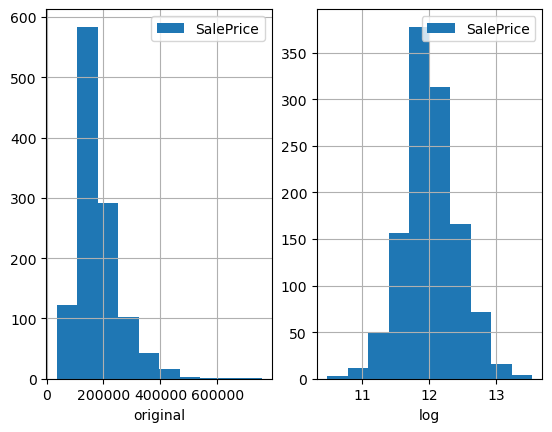

In [88]:
fig, axs = plt.subplots(1, 2)

df_train[LABEL].hist(ax=axs[0], legend=True)
axs[0].set_xlabel("original")
np.log1p(df_train[LABEL]).hist(ax=axs[1], legend=True)
axs[1].set_xlabel("log");

### Make sure LABEL column is last

In [89]:
y_train = df_train[LABEL]
y_test = df_test[LABEL]
df_train.drop(LABEL, axis=1, inplace=True)
df_test.drop(LABEL, axis=1, inplace=True)
df_train = pd.concat([df_train, y_train], axis=1)
df_test = pd.concat([df_test, y_test], axis=1)

### Saving intermediary files in artifacts directory

In [90]:
stage_name = "1_UnivariateAnalysis"

with open(
    file=f"notebooks/artifacts/{stage_name}_features_info.pkl", mode="wb"
) as file:
    pickle.dump(features_info, file)

df_train.to_pickle(path=f"notebooks/artifacts/{stage_name}_df_train.pkl")
df_test.to_pickle(path=f"notebooks/artifacts/{stage_name}_df_test.pkl")

del stage_name